<a href="https://colab.research.google.com/github/Sebastian-boot/Modelos_de_aprendizaje_supervisado_y_no_supervisado_ibero/blob/master/Actividad_3_M%C3%A9todos_de_aprendizaje_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje Supervisado


In [ ]:
#Importamos las librerías necesarias para el trabajo.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Cargamos el archivo
url = 'https://raw.githubusercontent.com/it-ces/Datasets/refs/heads/main/bankruptcy-competition.csv'
df = pd.read_csv(url)


In [ ]:
#Limpiamos el dataset de las columnas que no vemos necesarias
df_cleaned = df.drop(columns=['Unnamed: 0'])

In [ ]:
# Separar características (X) y el objetivo (y)
X = df_cleaned.drop(columns=['event'])
y = df_cleaned['event']

In [ ]:
#La columna 'Sector' es categórica
le = LabelEncoder()
X['Sector'] = le.fit_transform(X['Sector'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamos el modelo de arbol de decision
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Predecimos, evaluamos y finalmente mostramos el resultado
y_pred = clf.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Informe de clasificación:\n", classification_rep)

Informe de clasificación:
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      7760
         1.0       0.06      0.03      0.04       251

    accuracy                           0.95      8011
   macro avg       0.51      0.51      0.51      8011
weighted avg       0.94      0.95      0.95      8011



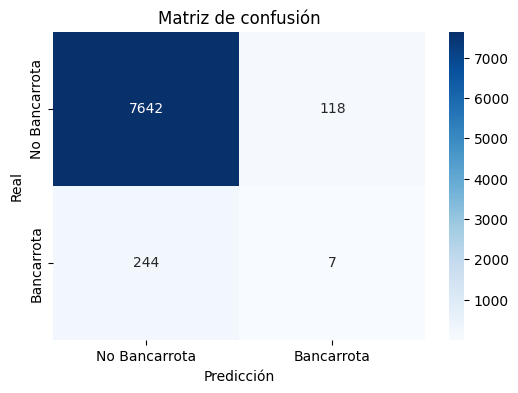

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No Bancarrota", "Bancarrota"],
            yticklabels=["No Bancarrota", "Bancarrota"])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión')
plt.show()

# Aprendizaje no supervisado


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Cargamos nuevamente el archivo
url = 'https://raw.githubusercontent.com/it-ces/Datasets/refs/heads/main/bankruptcy-competition.csv'
df = pd.read_csv(url)

In [ ]:
#Seleccionar las columnas numéricas para el modelo
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.drop(['Unnamed: 0', 'event'])

In [ ]:
#Normalizamos los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_columns])

In [ ]:
# Imputar los valores faltantes con la media de cada columna
imputer = SimpleImputer(strategy='mean')
scaled_data_imputed = imputer.fit_transform(scaled_data)

In [ ]:
# Aplicamos el clustering K-Means con un número de clústeres arbitrario (por ejemplo, 3)
kmeans_imputed = KMeans(n_clusters=3, random_state=42)
clusters_imputed = kmeans_imputed.fit_predict(scaled_data_imputed)

In [ ]:
# Actualizar el dataset original con los nuevos clusters
df['Cluster'] = clusters_imputed

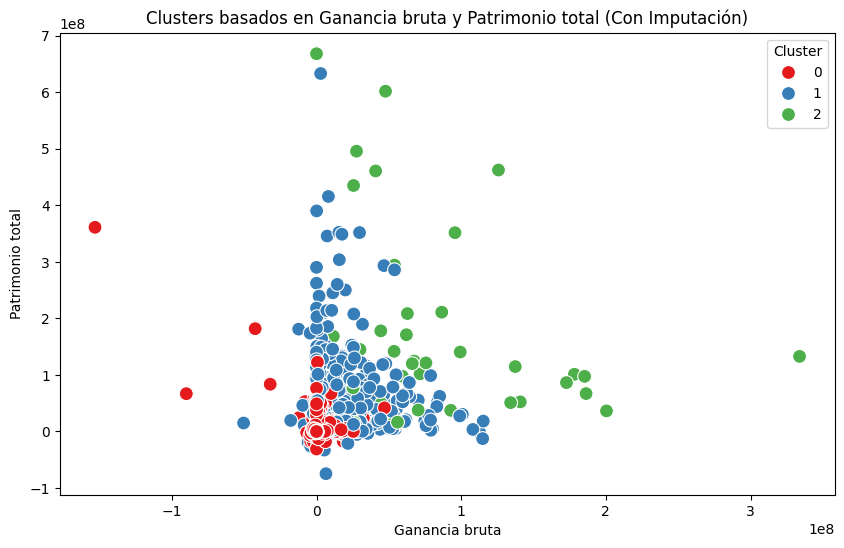

In [ ]:
# Visualización de los clusters tras la imputación
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Ganancia bruta'], y=df['Patrimonio total'], hue=df['Cluster'], palette='Set1', s=100)
plt.title('Clusters basados en Ganancia bruta y Patrimonio total (Con Imputación)')
plt.xlabel('Ganancia bruta')
plt.ylabel('Patrimonio total')
plt.show()

In [ ]:
# Mostrar los primeros datos con los clusters imputados
df[['Ganancia bruta', 'Patrimonio total', 'Cluster']].head()

,Ganancia bruta,Patrimonio total,Cluster
0,2.204035e+06,2.842086e+06,0
1,1.862384e+06,2.514738e+06,0
2,4.847356e+06,2.285790e+07,0
3,3.010297e+06,2.448525e+06,0
4,2.676592e+06,3.746414e+07,0
